In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns
from sklearn.impute import KNNImputer
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model, naive_bayes, neighbors, svm
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('heart_2020_cleaned.csv')
df.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
HeartDisease        319795 non-null object
BMI                 319795 non-null float64
Smoking             319795 non-null object
AlcoholDrinking     319795 non-null object
Stroke              319795 non-null object
PhysicalHealth      319795 non-null float64
MentalHealth        319795 non-null float64
DiffWalking         319795 non-null object
Sex                 319795 non-null object
AgeCategory         319795 non-null object
Race                319795 non-null object
Diabetic            319795 non-null object
PhysicalActivity    319795 non-null object
GenHealth           319795 non-null object
SleepTime           319795 non-null float64
Asthma              319795 non-null object
KidneyDisease       319795 non-null object
SkinCancer          319795 non-null object
dtypes: float64(4), object(14)
memory usage: 26.8+ MB


In [4]:
df.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [5]:
df.shape

(319795, 18)

In [6]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


# Menghapus Data Outlier

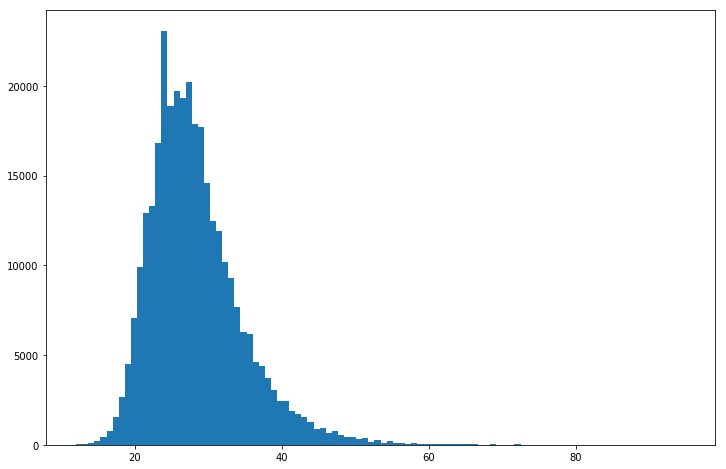

In [9]:
# detecting outlier
fig, ax = plt.subplots(figsize=(12,8))
ax.hist (df['BMI'], bins=100)
plt.show()

In [10]:
mean = df['BMI'].mean()
std = df['BMI'].std()

In [12]:
limit = 3*std

In [13]:
limit_atas = mean + 3*std
limit_bawah = mean - 3*std

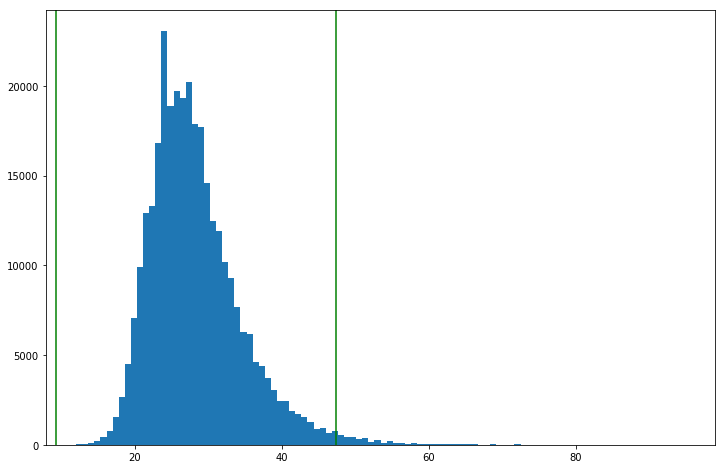

In [14]:
# detecting outlier
fig, ax = plt.subplots(figsize=(12,8))
ax.hist (df['BMI'], bins=100)

ax.axvline(limit_atas, color='green')
ax.axvline(limit_bawah, color='green')
plt.show()

In [15]:
(df['BMI'] < limit_bawah).sum()

0

In [17]:
(df['BMI'] > limit_atas).sum()

4081

In [21]:
new_df = df[(df['BMI'] < limit_atas) & (df['BMI'] > limit_bawah)]

In [58]:
new_df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No


In [23]:
new_df.shape

(315714, 18)

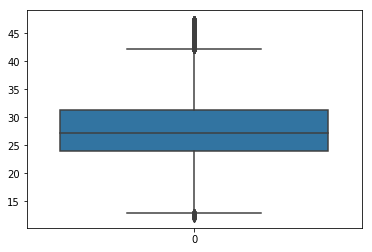

In [24]:
sns.boxplot(data=new_df['BMI'])

In [28]:
mean = new_df['MentalHealth'].mean()
std = new_df['MentalHealth'].std()

limit = 3*std
limit_atas = mean + 3*std
limit_bawah = mean - 3*std

In [29]:
new_df = new_df[(new_df['MentalHealth'] < limit_atas) & (new_df['MentalHealth'] > limit_bawah)]

In [32]:
mean = new_df['PhysicalHealth'].mean()
std = new_df['PhysicalHealth'].std()

limit = 3*std
limit_atas = mean + 3*std
limit_bawah = mean - 3*std

In [33]:
new_df = new_df[(new_df['PhysicalHealth'] < limit_atas) & (new_df['PhysicalHealth'] > limit_bawah)]

In [35]:
mean = new_df['SleepTime'].mean()
std = new_df['SleepTime'].std()

limit = 3*std
limit_atas = mean + 3*std
limit_bawah = mean - 3*std

In [36]:
new_df = new_df[(new_df['SleepTime'] < limit_atas) & (new_df['SleepTime'] > limit_bawah)]

# Grouping Masing-Masing kolom 

In [38]:
data=new_df.copy()

In [39]:
encoder = LabelEncoder()
data['HeartDisease'] = encoder.fit_transform(data['HeartDisease'])
HearDisease = {index : label for index, label in enumerate(encoder.classes_)}
HearDisease

{0: 'No', 1: 'Yes'}

In [40]:
data['AgeCategory']= encoder.fit_transform(data['AgeCategory'])
AgeCategory = {index : label for index, label in enumerate(encoder.classes_)}
AgeCategory

{0: '18-24',
 1: '25-29',
 2: '30-34',
 3: '35-39',
 4: '40-44',
 5: '45-49',
 6: '50-54',
 7: '55-59',
 8: '60-64',
 9: '65-69',
 10: '70-74',
 11: '75-79',
 12: '80 or older'}

In [41]:
data['Smoking'] = encoder.fit_transform(data['Smoking'])
Smoking = {index : label for index, label in enumerate(encoder.classes_)}
Smoking

{0: 'No', 1: 'Yes'}

In [42]:
data['AlcoholDrinking'] = encoder.fit_transform(data['AlcoholDrinking'])
AlcoholDrinking = {index : label for index, label in enumerate(encoder.classes_)}
AlcoholDrinking

{0: 'No', 1: 'Yes'}

In [43]:
data['Stroke'] = encoder.fit_transform(data['Stroke'])
Stroke = {index : label for index, label in enumerate(encoder.classes_)}

data['DiffWalking'] = encoder.fit_transform(data['DiffWalking'])
DiffWalking = {index : label for index, label in enumerate(encoder.classes_)}

data['Sex'] = encoder.fit_transform(data['Sex'])
Sex = {index : label for index, label in enumerate(encoder.classes_)}

data['Race'] = encoder.fit_transform(data['Race'])
Race = {index : label for index, label in enumerate(encoder.classes_)}

data['Diabetic'] = encoder.fit_transform(data['Diabetic'])
Diabetic = {index : label for index, label in enumerate(encoder.classes_)}

data['PhysicalActivity'] = encoder.fit_transform(data['PhysicalActivity'])
PhysicalActivity = {index : label for index, label in enumerate(encoder.classes_)}

data['GenHealth'] = encoder.fit_transform(data['GenHealth'])
GenHealth = {index : label for index, label in enumerate(encoder.classes_)}

data['Asthma'] = encoder.fit_transform(data['Asthma'])
Asthma = {index : label for index, label in enumerate(encoder.classes_)}

data['KidneyDisease'] = encoder.fit_transform(data['KidneyDisease'])
KidneyDisease = {index : label for index, label in enumerate(encoder.classes_)}

data['SkinCancer'] = encoder.fit_transform(data['SkinCancer'])
SkinCancer = {index : label for index, label in enumerate(encoder.classes_)}

data['AgeCategory']= encoder.fit_transform(data['AgeCategory'])
AgeCategory = {index : label for index, label in enumerate(encoder.classes_)}

In [44]:
# Drop data yang redundan
data = data.drop_duplicates()

# Reset index
data.reset_index(drop=True, inplace=True)
data = data
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
1,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
2,0,21.63,0,0,0,15.0,0.0,0,0,10,5,0,1,1,4.0,1,0,1
3,0,31.64,1,0,0,5.0,0.0,1,0,12,5,2,0,2,9.0,1,0,0
4,0,26.45,0,0,0,0.0,0.0,0,0,12,5,1,0,1,5.0,0,1,0


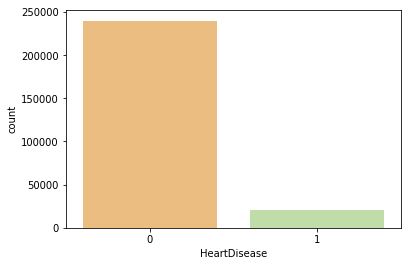

In [45]:
sns.countplot(x="HeartDisease", data=data, palette='Spectral')

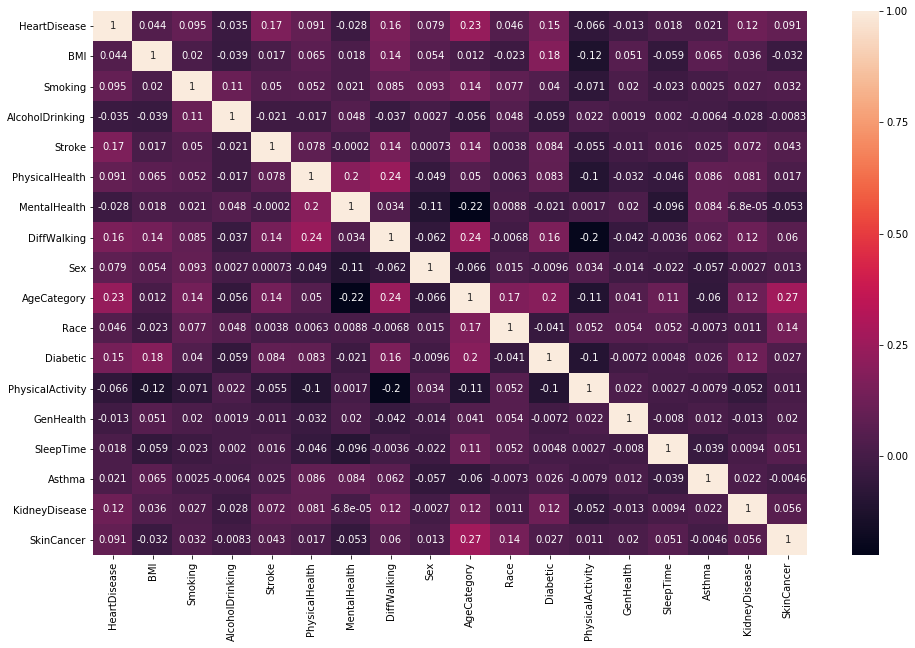

In [46]:
f, ax = plt.subplots(figsize=(16, 10))
RD = data.corr()
sns.heatmap(RD, ax=ax, annot=True)

In [47]:
#Data Split
x = data.drop('HeartDisease',axis=1)
y = data['HeartDisease']

In [48]:
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
X = scaler.fit_transform(x)

#showing data
print('x \n' , X[:10])
print('y \n' , y[:10])

x 
 [[0.23406064 0.         0.         1.         0.         0.
  0.         0.         1.         1.         0.         1.
  1.         0.42857143 0.         0.         0.        ]
 [0.34372343 0.         0.         0.         0.         0.
  0.         0.         0.91666667 1.         0.         0.
  0.5        0.28571429 0.         0.         1.        ]
 [0.27061491 0.         0.         0.         0.625      0.
  0.         0.         0.83333333 1.         0.         1.
  0.25       0.         1.         0.         1.        ]
 [0.55426466 1.         0.         0.         0.20833333 0.
  1.         0.         1.         1.         0.66666667 0.
  0.5        0.71428571 1.         0.         0.        ]
 [0.40719751 0.         0.         0.         0.         0.
  0.         0.         1.         1.         0.33333333 0.
  0.25       0.14285714 0.         1.         0.        ]
 [0.81071125 0.         0.         0.         0.         0.
  1.         1.         0.75       1.         

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=0)

# Random Forest Classifier

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
RandomForestClassifierModel = RandomForestClassifier(criterion = 'gini',n_estimators=100,max_depth=5,random_state=33) #criterion can be also : entropy 
RandomForestClassifierModel.fit(x_train, y_train)

#Calculating Details
print('RandomForestClassifierModel Train Score is : ' , RandomForestClassifierModel.score(x_train, y_train))
print('RandomForestClassifierModel Test Score is : ' , RandomForestClassifierModel.score(x_test, y_test))
print('RandomForestClassifierModel features importances are : ' , RandomForestClassifierModel.feature_importances_)
print('----------------------------------------------------')

#Calculating Prediction
y_pred = RandomForestClassifierModel.predict(x_test)
y_pred_prob = RandomForestClassifierModel.predict_proba(x_test)
print('Predicted Value for RandomForestClassifierModel is : ' , y_pred[:10])
print('Prediction Probabilities Value for RandomForestClassifierModel is : ' , y_pred_prob[:10])

RandomForestClassifierModel Train Score is :  0.9226067289025007
RandomForestClassifierModel Test Score is :  0.9222296972609323
RandomForestClassifierModel features importances are :  [0.00518126 0.02672274 0.00059046 0.18594661 0.01408845 0.00125755
 0.11545868 0.06042386 0.35521122 0.00489402 0.09339591 0.00175379
 0.07045812 0.00229302 0.00151929 0.04765074 0.01315427]
----------------------------------------------------
Predicted Value for RandomForestClassifierModel is :  [0 0 0 0 0 0 0 0 0 0]
Prediction Probabilities Value for RandomForestClassifierModel is :  [[0.86832946 0.13167054]
 [0.91073177 0.08926823]
 [0.93647559 0.06352441]
 [0.89190915 0.10809085]
 [0.92832287 0.07167713]
 [0.97837102 0.02162898]
 [0.98283578 0.01716422]
 [0.82268655 0.17731345]
 [0.7550117  0.2449883 ]
 [0.89377058 0.10622942]]


In [52]:
from sklearn.metrics import accuracy_score

In [53]:
AccScore = accuracy_score(y_test, y_pred, normalize=False)
print('Accuracy Score is : ', AccScore)

Accuracy Score is :  95958


In [54]:
from sklearn.metrics import f1_score
#Calculating F1 Score  : 2 * (precision * recall) / (precision + recall)
# f1_score(y_true, y_pred, labels=None, pos_label=1, average=’binary’, sample_weight=None)

F1Score = f1_score(y_test, y_pred, average='micro') #it can be : binary,macro,weighted,samples
print('F1 Score is : ', F1Score)

F1 Score is :  0.9222296972609323


# Decision Tree Classifier

In [55]:
from sklearn.tree import DecisionTreeClassifier 
# Import Decision Tree Classifier
from sklearn.ensemble import BaggingClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics 


tree = DecisionTreeClassifier(max_depth=3, random_state=23)

# The baggging ensemble classifier is initialized with:

bagging = BaggingClassifier(base_estimator=tree, n_estimators=5, max_samples=50, bootstrap=True)

# Training
bagging.fit(x_train, y_train)

# Evaluating
print(f"Train score: {bagging.score(x_train, y_train)}")
print(f"Test score: {bagging.score(x_test, y_test)}")

# Train Decision Tree Classifer
tree = tree.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = tree.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Train score: 0.9135724949222479
Test score: 0.9131763575204229
Accuracy: 0.922200864968765


# Naive Bayes Gaussian

In [56]:
nb = naive_bayes.GaussianNB()
nb.fit(x_train, y_train)
nb_acc = 100*nb.score(x_test, y_test)
print('Naive Bayes Predictions: \n', nb.predict(x_test), '\n Accuracy:', nb_acc, '%')

Naive Bayes Predictions: 
 [1 0 0 ... 0 0 0] 
 Accuracy: 85.69437770302738 %


# Logistic Regression

In [57]:
log_reg = linear_model.LogisticRegression(max_iter = 5000)
log_reg.fit(x_train, y_train)
log_reg_acc = 100*log_reg.score(x_test, y_test)
print('Logistic Regression Predictions: \n', log_reg.predict(x_test), '\n Accuracy:', log_reg_acc, '%')

Logistic Regression Predictions: 
 [0 0 0 ... 0 0 0] 
 Accuracy: 92.22296972609323 %


# Ringkasan

Random Forest Classifier = 92,2%
Decision Tree Classifier = 92,2%
Naive Bayes Gaussian = 85,69%
Logistic Regression = 92,2%